<a href="https://colab.research.google.com/github/kaylamalherbe/COMP3710/blob/main/Prac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import torch
import numpy as np
print("PyTorch Version:", torch.__version__)


PyTorch Version: 2.8.0+cu126


In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [23]:
!pip install tensorflow

In [24]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.19.0


In [25]:
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]
x = torch.Tensor(X)
y = torch.Tensor(Y)
x = x.to(device)
y = y.to(device)
z = torch.exp(-(x**2+y**2)/2.0)

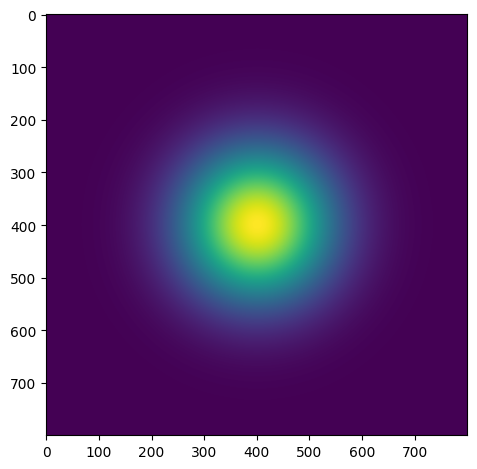

In [26]:
#plot
import matplotlib.pyplot as plt
plt.imshow(z.cpu().numpy())#Updated!
plt.tight_layout()
plt.show()

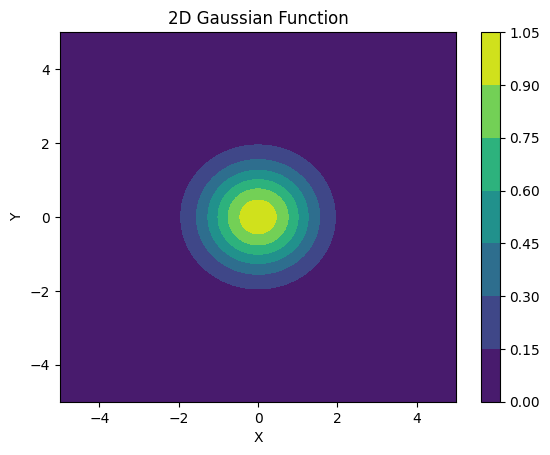

In [27]:
#Generated with Gemini AI
#Prompt: Generate a Python script to plot a 2D Gaussian function using Numpy and Matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters of the Gaussian function
mu_x = 0.0
mu_y = 0.0
sigma_x = 1.0
sigma_y = 1.0

# Create a grid of points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Calculate the 2D Gaussian function
Z = np.exp(-((X - mu_x)**2 / (2 * sigma_x**2) + (Y - mu_y)**2 / (2 * sigma_y**2)))

# Plot the 2D Gaussian function
plt.figure()
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar()
plt.title('2D Gaussian Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

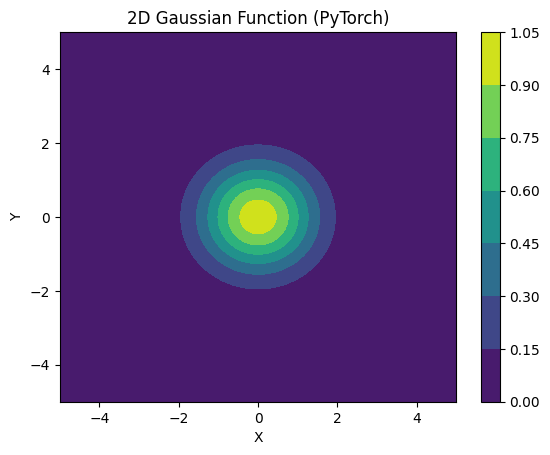

In [28]:
# Using Gemini AI
#prompt: convert the last script to PyTorch and to use Tensors instead of Numpy to plot a 2D Gaussian function
import torch
import matplotlib.pyplot as plt

# Define the parameters of the Gaussian function using PyTorch Tensors
mu_x = torch.tensor(0.0)
mu_y = torch.tensor(0.0)
sigma_x = torch.tensor(1.0)
sigma_y = torch.tensor(1.0)

# Create a grid of points using PyTorch Tensors
x = torch.linspace(-5, 5, 100)
y = torch.linspace(-5, 5, 100)
X, Y = torch.meshgrid(x, y, indexing='xy')

# Calculate the 2D Gaussian function using PyTorch Tensors
Z = torch.exp(-((X - mu_x)**2 / (2 * sigma_x**2) + (Y - mu_y)**2 / (2 * sigma_y**2)))

# Plot the 2D Gaussian function using Matplotlib
plt.figure()
plt.contourf(X.numpy(), Y.numpy(), Z.numpy(), cmap='viridis')
plt.colorbar()
plt.title('2D Gaussian Function (PyTorch)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

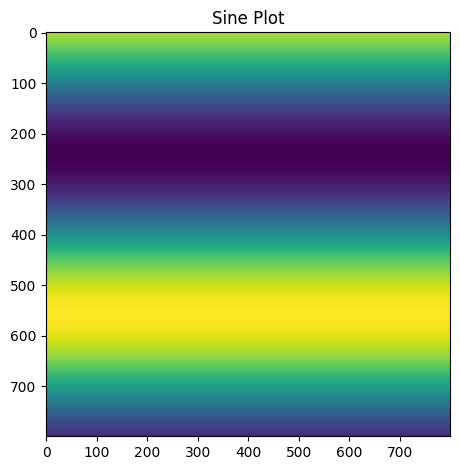

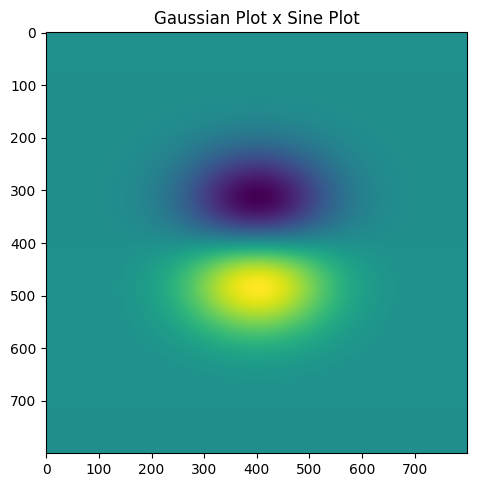

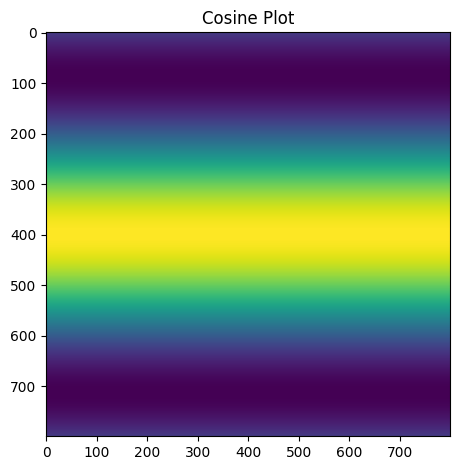

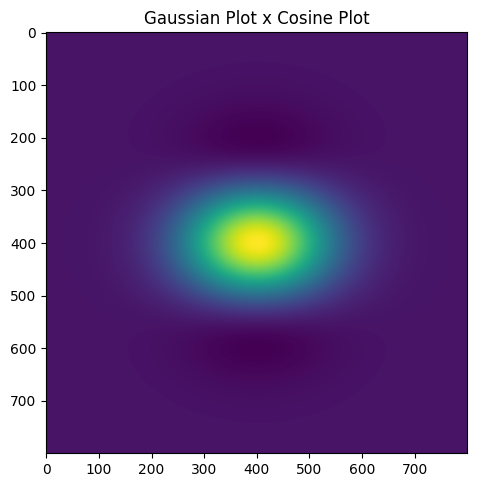

In [37]:
# Multiple Gaussian and sine
X, Y = np.mgrid[-4.0:4:0.01, -4.0:4:0.01]
x = torch.Tensor(X)
y = torch.Tensor(Y)
x = x.to(device)
y = y.to(device)
z = torch.exp(-(x**2+y**2)/2.0)

sineplot = torch.sin(x)
#plot
import matplotlib.pyplot as plt
plt.imshow(sineplot.cpu().numpy())#Updated!
plt.title("Sine Plot")
plt.tight_layout()
plt.show()

mult = z * sineplot
#plot
plt.imshow(mult.cpu().numpy())#Updated!
plt.tight_layout()
plt.title("Gaussian Plot x Sine Plot")
plt.show()

cosplot = torch.cos(x)
#plot
import matplotlib.pyplot as plt
plt.imshow(cosplot.cpu().numpy())#Updated!
plt.title("Cosine Plot")
plt.tight_layout()
plt.show()

mult = z * cosplot
#plot
plt.imshow(mult.cpu().numpy())#Updated!
plt.tight_layout()
plt.title("Gaussian Plot x Cosine Plot")
plt.show()


Task 2: Mandlebrot set

In [ ]:
import torch
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
Y, X = np.mgrid[-1.3:1.3:0.005, -2:1:0.005] # shape 2600, 3000
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

In [ ]:
#Mandelbrot Set
for i in range(200):
  #Compute the new values of z: z^2 + x
  zs_ = zs*zs + z
  #Have we diverged with this new value?
  not_diverged = torch.abs(zs_) < 4.0
  #Update variables to compute
  ns += not_diverged
  zs = zs_

In [ ]:
#plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
  """Display an array of iteration counts as a
  colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

In [ ]:
#Zoomed Mandelbrot
Y, X = np.mgrid[1.09:1.095:0.000001, -0.185:-0.18:0.000001] # zoom by changing grid
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
zs = z.clone() #Updated!
ns = torch.zeros_like(z)
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

num_iterations = 1000
#Mandelbrot Set
for i in range(num_iterations):
  #Compute the new values of z: z^2 + x
  zs_ = zs*zs + z
  #Have we diverged with this new value?
  not_diverged = torch.abs(zs_) < 4.0
  #Update variables to compute
  ns += not_diverged
  zs = zs_

  #plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
  """Display an array of iteration counts as a
  colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()


AI generated Mandelbrot

In [ ]:
# Generated with Gemini:
# prompt
# Generate the mandelbrot set fractal implemented in pytorch that runs on the GPU, comment each line of code to explain the purpose.

import torch
import matplotlib.pyplot as plt
import numpy as np

# Set the device to GPU if available, otherwise CPU
# This line determines whether calculations will run on the GPU or CPU.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}") # Print the chosen device to the console.

# --- Fractal Parameters ---
# Define the width of the output image in pixels.
width = 1000
# Define the height of the output image in pixels.
height = 1000
# Define the maximum number of iterations for the Mandelbrot calculation.
# Higher values produce more detail but take longer.
max_iterations = 256

# Define the complex plane region to visualize.
# These values determine the center and zoom level of the fractal.
# Real part of the center of the view.
cx = -0.75
# Imaginary part of the center of the view.
cy = 0.0
# The half-width of the view in the complex plane.
# Smaller values mean more zoom.
zoom = 2.5

# --- Create Complex Grid for C-plane ---
# Generate an array of x-coordinates, scaled to the complex plane's real axis.
# This creates a 1D tensor for the real part of c.
x_coords = torch.linspace(cx - zoom, cx + zoom, width, device=device, dtype=torch.float32)
# Generate an array of y-coordinates, scaled to the complex plane's imaginary axis.
# This creates a 1D tensor for the imaginary part of c.
y_coords = torch.linspace(cy - zoom, cy + zoom, height, device=device, dtype=torch.float32)

# Create a 2D meshgrid of complex numbers (c) for each pixel.
# `x_coords` becomes the real part (columns), `y_coords` becomes the imaginary part (rows).
# The `outer` function creates a complex tensor where each element (r, i) is r + i*j.
# This represents the initial 'c' value for each pixel in the fractal.
c = torch.outer(torch.ones(height, device=device), x_coords) + \
    1j * torch.outer(y_coords, torch.ones(width, device=device))

# Initialize z for the iteration.
# Start z at 0 for all points in the complex plane.
z = torch.zeros_like(c)
# Initialize the output array to store the iteration count for each pixel.
# This will hold the "color" value for each pixel.
mandelbrot_set = torch.zeros(height, width, device=device, dtype=torch.int32)

# --- Mandelbrot Iteration Loop ---
# Loop for the maximum number of iterations.
for i in range(max_iterations):
    # Check which points have not yet diverged.
    # A point diverges if its magnitude squared (z.real**2 + z.imag**2) exceeds 4.
    # `|z|^2 < 4` is the condition for remaining in the set.
    # `torch.abs(z)` computes the magnitude, `**2` squares it.
    # `non_diverged` is a boolean mask indicating active pixels.
    non_diverged = (torch.abs(z) <= 2.0)

    # If all points have diverged, break the loop early.
    if not torch.any(non_diverged):
        break

    # Update the z values only for the non-diverged points.
    # This is the core Mandelbrot iteration: z_new = z_old^2 + c.
    z[non_diverged] = z[non_diverged]**2 + c[non_diverged]

    # For points that just diverged in this iteration (magnitude > 2.0)
    # and were previously non_diverged, record the iteration count.
    # `(torch.abs(z) > 2.0)` are points that just diverged.
    # `& non_diverged` ensures we only consider points that were previously active.
    # `mandelbrot_set[newly_diverged] = i + 1` assigns the iteration count (plus 1).
    newly_diverged = (torch.abs(z) > 2.0) & non_diverged
    mandelbrot_set[newly_diverged] = i + 1

# Move the result back to CPU for plotting with Matplotlib.
# Matplotlib works with NumPy arrays, so convert the tensor to a NumPy array.
mandelbrot_np = mandelbrot_set.cpu().numpy()

# --- Plotting the Mandelbrot Set ---
# Create a figure and an axes for the plot.
plt.figure(figsize=(10, 10))
# Display the Mandelbrot set using `imshow`.
# `origin='lower'` sets the origin of the image to the bottom-left.
# `extent` defines the coordinates of the image boundaries for correct scaling.
# `cmap='hot'` uses a colormap where higher iteration counts (diverged faster) are brighter.
# Alternatively, `cmap='twilight'` or `cmap='magma'` can give nice results.
plt.imshow(mandelbrot_np, cmap='hot', origin='lower',
           extent=[cx - zoom, cx + zoom, cy - zoom, cy + zoom])
# Set the title of the plot.
plt.title(f"Mandelbrot Set (Iterations: {max_iterations})")
# Label the x-axis as "Real" (for the real part of the complex plane).
plt.xlabel("Real")
# Label the y-axis as "Imaginary" (for the imaginary part of the complex plane).
plt.ylabel("Imaginary")
# Remove tick marks for a cleaner look, as the extent provides context.
plt.xticks([])
plt.yticks([])
# Display the plot.
plt.show()

# --- Optional: Further Zoom ---
# To zoom into a specific point, you would change cx, cy, and zoom.
# For example, to zoom into the famous "seahorse valley":
# cx = -0.7436438
# cy = 0.1318259
# zoom = 0.0000001
# Rerun the code with these new parameters.


In [ ]:
# Interactive Mandelbrot Set with Zoom
import torch
import matplotlib.pyplot as plt
import numpy as np

# Set the device to GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- Fractal Parameters (Initial) ---
width = 1000
height = 1000
max_iterations = 256

# Define the complex plane region to visualize.
cx = -0.75
cy = 0.0
zoom = 0.10

# Function to generate and plot the Mandelbrot set
def plot_mandelbrot(cx, cy, zoom, width, height, max_iterations):
    # Create a 2D meshgrid of complex numbers (c) for each pixel.
    x_coords = torch.linspace(cx - zoom, cx + zoom, width, device=device, dtype=torch.float32)
    y_coords = torch.linspace(cy - zoom, cy + zoom, height, device=device, dtype=torch.float32)

    c = torch.outer(torch.ones(height, device=device), x_coords) + \
        1j * torch.outer(y_coords, torch.ones(width, device=device))

    # Initialize z for the iteration.
    z = torch.zeros_like(c)
    mandelbrot_set = torch.zeros(height, width, device=device, dtype=torch.int32)

    # --- Mandelbrot Iteration Loop ---
    for i in range(max_iterations):
        non_diverged = (torch.abs(z) <= 2.0)

        if not torch.any(non_diverged):
            break

        z[non_diverged] = z[non_diverged]**2 + c[non_diverged]

        newly_diverged = (torch.abs(z) > 2.0) & non_diverged
        mandelbrot_set[newly_diverged] = i + 1

    # Move the result back to CPU for plotting with Matplotlib.
    mandelbrot_np = mandelbrot_set.cpu().numpy()

    # Plotting
    plt.figure(figsize=(10, 10))
    plt.imshow(mandelbrot_np, cmap='hot', origin='lower',
               extent=[cx - zoom, cx + zoom, cy - zoom, cy + zoom])
    plt.title(f"Mandelbrot Set (Iterations: {max_iterations})")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.xticks([])
    plt.yticks([])
    plt.show()

# Initial plot
plot_mandelbrot(cx, cy, zoom, width, height, max_iterations)

# Note: Implementing interactive zoom directly within a single Colab cell's output
# can be complex and might require more advanced techniques or external libraries.
# The provided code generates a new plot each time with updated parameters.
# For true interactive zoom where the plot updates without re-running the cell,
# you would typically need to use a different plotting backend or framework
# that supports interactive events within the notebook environment.

Modifying Mandelbrot to get Julia set


Mandelbrot is F(z) = z^2 + c


Julia Set is also F(z) = z^2 + c
both quadratic sets


Mandelbrot is every possible julia set so just choose one  z and c point to create Julia set.

f(z)=z^2+c where c is approximately -0.5125 + 0.5213i.



In [ ]:
import torch
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Y, X = np.mgrid[-1.3:1.3:0.001, -2:2:0.001]
x = torch.Tensor(X)
y = torch.Tensor(Y)
z = torch.complex(x, y) #important!
print(z)
zs = z.clone() #Updated!
ns = torch.zeros_like(z)
z = z.to(device)
zs = zs.to(device)
ns = ns.to(device)

c = -0.5125 + 0.5213j


#Mandelbrot Set
for i in range(200):
  #Compute the new values of z: z^2 + x
  zs_ = zs*zs + c
  #Have we diverged with this new value?
  not_diverged = torch.abs(zs_) < 4.0
  #Update variables to compute
  ns += not_diverged
  zs = zs_

  #plot
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,10))
def processFractal(a):
  """Display an array of iteration counts as a
  colorful picture of a fractal."""
  a_cyclic = (6.28*a/20.0).reshape(list(a.shape)+[1])
  img = np.concatenate([10+20*np.cos(a_cyclic),
  30+50*np.sin(a_cyclic),
  155-80*np.cos(a_cyclic)], 2)
  img[a==a.max()] = 0
  a = img
  a = np.uint8(np.clip(a, 0, 255))
  return a

plt.imshow(processFractal(ns.cpu().numpy()))
plt.tight_layout(pad=0)
plt.show()

Part 3 Fractal Implementation
Chosen Fractal


In [ ]:
# see git repo here: https://github.com/kaylamalherbe/Fractals

In [ ]:
import torch
import matplotlib.pyplot as plt

depth = 10

#        /\
#       /  \
# (0,0)/____\ (1, 0)
#
# Equalirateral triangle = 180/3 = 60 degrees per side
# a^2 + b^2 = c^2
# 0.5^2 + b^2 = 1^2
#  b^2 = 0.75
# b = sqrt(0.75)
#top point will be at coord (1/2, )
inital_triangle = torch.tensor([[0.0, 0.0], [1/2, torch.sqrt(torch.tensor(0.75))], [1.0, 0.0], [0.0, 0.0]])

for i in range(0, depth):
  koch = []
  for j in range (0, len(inital_triangle)-1):
    n1 = inital_triangle[j]
    n2 = inital_triangle[j+1]

    # divide into 3 - remove middle piece and add peaks
    #           c
    #          /\
    #         /  \
    #     a__/b  d\___
    a = n1
    b = n1 + (n2 - n1) / 3
    d = n1 + 2 * (n2 - n1) / 3
    c = b + torch.tensor([
                (d[0] - b[0]) * torch.cos(torch.tensor(torch.pi / 3)) - (d[1] - b[1]) * torch.sin(torch.tensor(torch.pi / 3)),
                (d[0] - b[0]) * torch.sin(torch.tensor(torch.pi / 3)) + (d[1] - b[1]) * torch.cos(torch.tensor(torch.pi / 3))
            ])
    koch.extend([a, b, c, d])
  koch.append(inital_triangle[-1])
  inital_triangle = torch.stack(koch)

# plot koch
plt.plot(inital_triangle[:, 0].numpy(), inital_triangle[:, 1].numpy())
plt.title(f"Koch Snowflake Fractal (depth {depth})")
plt.show()
# # plot
# plt.plot(koch[:, 0].numpy(), koch[:, 1].numpy())
# plt.title(f"Koch Snowflake Fractal (depth {depth})")
# plt.show()

